In [384]:
import numpy as np
import pandas as pd
import random

In [385]:
data = {
    'Column1': np.random.randint(1, 100, 10),
    'Column2': np.random.rand(10),
    'Column3': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Column4': np.random.choice([True, False], size=10),
    'Column5': pd.date_range('2022-01-01', periods=10)
}

sample_df = pd.DataFrame(data)

len(sample_df.to_numpy())
sample_df.to_numpy().shape[1]

5

## Example Perceptron 

In [386]:
def generate_data(self) -> None:
        
        """
        This function generates artificial data for the exercise.
        """

        self.X = np.empty(100)
        self.y = np.empty(100)
        
        for i in range(100):
            if random.random() < 0.5:
                self.X[i] = np.random.normal(loc=-1.25, scale=0.75)
                self.y[i] = 0
            else:
                self.X[i] = np.random.normal(loc=1.25, scale=0.75)
                self.y[i] = 1

In [387]:
df = pd.read_csv("../datasets/advertising.csv")
# df = df[:20]
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [388]:
# from perceptron import Perceptron
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Sales', axis=1), df['Sales'], test_size=0.2, random_state=42)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [417]:
class Perceptron:
    def __init__(self, bias=1):
        self.__bias = bias
        self.__weights = None
        self.learning_rate = None  # Initialize learning_rate

    def fit(self, X_train, y_train):
        # Initialize weights with small random values
        self.__weights = np.random.randn(X_train.shape[1]) / np.sqrt(X_train.shape[1])
        
        self.X_train = X_train
        self.y_train = y_train.to_numpy()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.__weights) + self.__bias)

    def loss(self, y_pred, y_true):
        return np.mean( ( y_pred - y_true ) ** 2 )

    def backward(self, y_pred, y_true):
        
        # Compute the derivative of the mse loss function
        dL_dw = - 2 * sum(map(lambda xi, y_pred_i, y_true_i : ( y_true_i - ( 1 / 1 + np.exp(-y_pred_i) ) * ( ( xi * np.exp(y_pred_i) ) /  ( ( 1 + np.exp(-y_pred_i) ) **2 ) ) ), self.X_train, y_pred, y_true))
        # dL_dw = - 2 * np.sum( y_true - ( 1 / 1 + np.exp(-y_pred.reshape(-1, 1)) ) * ( ( self.X_train * np.exp(-y_pred.reshape(-1, 1)) ) / ( ( 1 + np.exp(-y_pred.reshape(-1, 1)) ) **2 ) ) , axis = 0)
        
        
        
        dL_db = - 2 * np.sum( y_true - ( 1 / 1 + np.exp(-y_pred) ) * ( ( np.exp(-y_pred) ) / ( ( 1 + np.exp(-y_pred) ) **2 ) ) )
        
        self.__weights -= self.learning_rate * dL_dw
        self.__bias -= self.learning_rate * dL_db

    def train(self, epochs=100, learning_rate=0.01):
        
        self.learning_rate = learning_rate

        for epoch in range(epochs):
            
            # Forward pass
            y_pred = self.forward(self.X_train)
    
            
            # Compute and print loss
            loss = self.loss(y_pred, self.y_train)

            # Backward pass
            self.backward(y_pred, self.y_train)

            if epoch % 10 == 0:
                # print(f"Y_Pred: {y_pred}")
                print(f'Epoch: {epoch}, Loss: {loss}\n')

In [403]:
# class Perceptron:
#     def __init__(self, bias=1):
#         self.__bias = bias
#         self.__weights = None
#         self.learning_rate = None  # Initialize learning_rate

#     def fit(self, X_train, y_train):
#         # Initialize weights with small random values
#         self.__weights = np.random.randn(X_train.shape[1]) / np.sqrt(X_train.shape[1])
        

#         self.X_train = X_train
#         self.y_train = y_train.to_numpy()

#     def sigmoid(self, x):
#         # Clip values to avoid overflow in np.exp
#         return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

#     def forward(self, X):
#         return self.sigmoid(np.dot(X, self.__weights) + self.__bias)

#     def loss(self, y_pred, y_true):
#         epsilon = 1e-7
#         loss = - (y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
#         return np.mean(loss)

#     def backward(self, y_pred, y_true):
        
#         epsilon = 1e-7
#         # d_cross_entropy = sum(map(lambda y_pred_i, y_true_i : (y_pred_i - y_true_i) / (y_pred_i * (1 - y_pred_i) + epsilon), y_pred, y_true))
#         d_cross_entropy = np.sum((y_pred - y_true) / (y_pred * (1 - y_pred) + epsilon))
        
#         # d_weights = sum(map(lambda xi, y_pred_i : ( xi * np.exp(-y_pred_i) ) / ( ( 1 + np.exp(-y_pred_i) ) ** 2 ), self.X_train, y_pred))
#         d_weights = np.sum(self.X_train * np.exp(-y_pred.reshape(-1, 1)) / ((1 + np.exp(-y_pred.reshape(-1, 1))) ** 2), axis=0)
        
#         # d_bias = sum(map(lambda y_pred_i : ( np.exp(-y_pred_i) ) / ( ( 1 + np.exp(-y_pred_i) ) ** 2 ), y_pred))
#         d_bias = np.sum(np.exp(-y_pred) / ((1 + np.exp(-y_pred)) ** 2))
        
#         # print(f"d_cross_entropy: {d_cross_entropy}\n")
        
#         dL_dw = d_cross_entropy * d_weights
#         dL_db = d_cross_entropy * d_bias
        
#         # Update weights and bias
#         self.__weights -= self.learning_rate * dL_dw
#         self.__bias -= self.learning_rate * dL_db
        

#     def train(self, epochs=100, learning_rate=0.01):
#         self.learning_rate = learning_rate

#         for epoch in range(epochs):
            
#             # Forward pass
#             y_pred = self.forward(self.X_train)

#             # Compute and print loss
#             loss = self.loss(y_pred, self.y_train)

#             # print(f"Weights: {self.__weights}\nBias: {self.__bias}\nLoss: {loss}\n")

#             # Backward pass
#             self.backward(y_pred, self.y_train)

#             if epoch % 100 == 0:
#                 # print(f"Y_Pred: {y_pred}")
#                 print(f'Epoch: {epoch}, Loss: {loss}\n')
                
#         # training accuracy
#         y_pred = self.forward(self.X_train)
        
#         y_pred = np.where(y_pred > 0.5, 1, 0)
#         print(f"Training Accuracy: {np.mean(y_pred == self.y_train)}")

In [418]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron.train(epochs = 100, learning_rate = 0.01)


Epoch: 0, Loss: 239.3261132261536

Epoch: 10, Loss: 239.21245241640537

Epoch: 20, Loss: 239.2055207944664

Epoch: 30, Loss: 239.20498191095817

Epoch: 40, Loss: 239.20494087376642

Epoch: 50, Loss: 239.20493775624513

Epoch: 60, Loss: 239.2049375194621

Epoch: 70, Loss: 239.20493750147816

Epoch: 80, Loss: 239.2049375001123

Epoch: 90, Loss: 239.2049375000085



C:\Users\User\AppData\Local\Temp\ipykernel_15376\2241880846.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


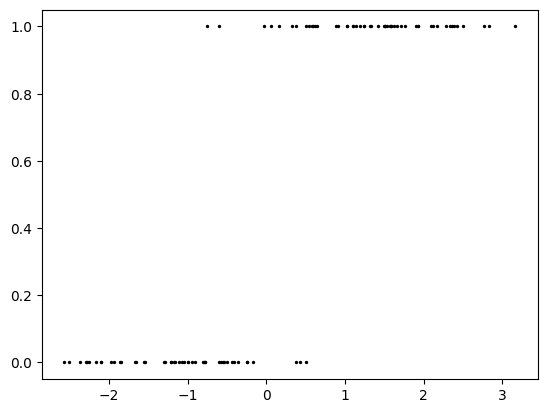

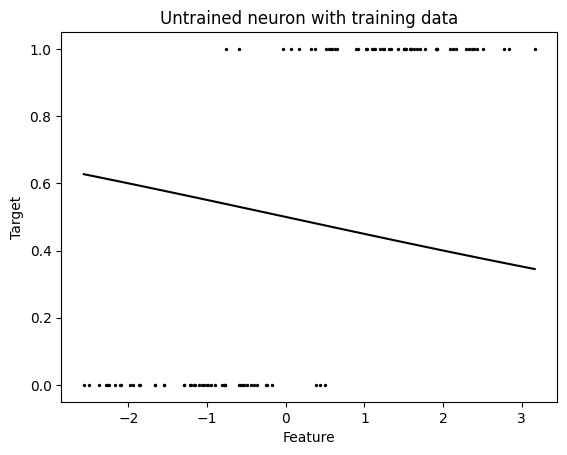

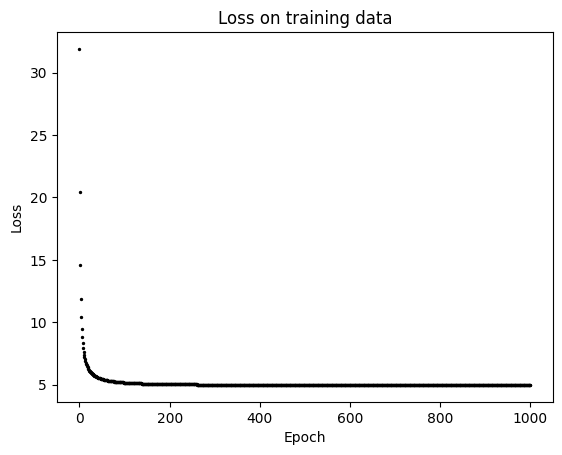

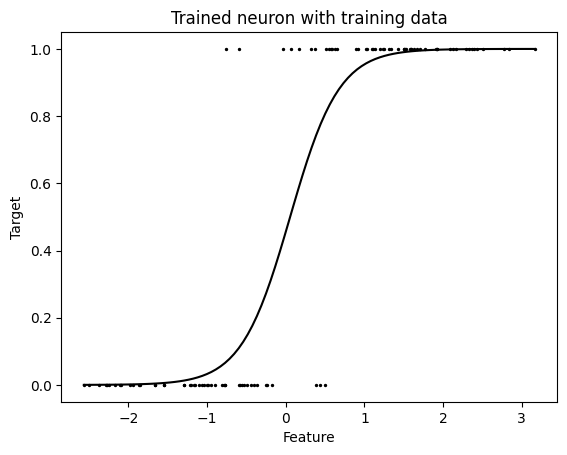

In [ ]:
#please report any bugs that you may find

#fake data
def generate_data ():
    from random import random
    from numpy.random import normal
    x = []
    y = []
    for i in range(100):
        if random() < 0.5:
            x.append(normal(loc=-1.25, scale=0.75))
            y.append(0)
        else:
            x.append(normal(loc=1.25, scale=0.75))
            y.append(1)
    return x, y

data = generate_data()

import matplotlib.pyplot as plt
plt.scatter(data[0],data[1], color="black", s=2)
plt.show()

from math import exp
from random import random

class neuron_fitting ():
    def __init__ (self, x:list[float], y:list[float]):
        assert(len(x) == len(y)), "The x-vector and the y-vector are of different length."
        #initialization of parameters
        self.b = 0
        self.w = 2*random()-1
        #data
        self.x = x
        self.y = y
        #history
        self.loss_history = []
    def forward (self, x):
        return 1/(1+exp(-self.w*x - self.b))
    def loss (self):
        return sum(map(lambda xi, yi: (self.forward(xi)-yi)**2, self.x, self.y))
    def train (self, learning_rate=0.01, number_epochs=100):
        self.loss_history = [self.loss()]
        #loop
        for t in range(number_epochs):
            #derivative of squared-error-loss with respect to b
            dLossdb = -2 * sum(map(lambda xi, yi: (yi - 1/(1+exp(-self.w*xi-self.b)))*(exp(-self.w*xi-self.b)/(1+exp(-self.w*xi-self.b))**2), self.x, self.y))
            #derivative of squared-error loss with respect to w
            dLossdw = -2 * sum(map(lambda xi, yi: (yi - 1/(1+exp(-self.w*xi-self.b)))*(xi*exp(-self.w*xi-self.b)/(1+exp(-self.w*xi-self.b))**2), self.x, self.y))
            #taking gradient steps
            self.b -= learning_rate * dLossdb
            self.w -= learning_rate * dLossdw
            #new loss
            self.loss_history.append(self.loss())


myneuron = neuron_fitting(data[0], data[1])

#plot data with unfitted network
from numpy import linspace
plt.title("Untrained neuron with training data")
plt.xlabel("Feature")
plt.ylabel("Target")
grid = linspace(min(myneuron.x), max(myneuron.x), 100)
plt.scatter(data[0], data[1], color="black", s=2)
plt.plot(grid, [myneuron.forward(x) for x in grid], color="black")
plt.show()

#training
myneuron.train(number_epochs=1000, learning_rate=0.01)

#plot loss history
plt.title("Loss on training data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.scatter(range(len(myneuron.loss_history)), myneuron.loss_history, color="black", s=2)
plt.show()

#plot data with fitted network
plt.title("Trained neuron with training data")
plt.xlabel("Feature")
plt.ylabel("Target")
grid = linspace(min(myneuron.x), max(myneuron.x), 100)
plt.scatter(data[0], data[1], color="black", s=2)
plt.plot(grid, [myneuron.forward(x) for x in grid], color="black")
plt.show()



